In [11]:
import pandas as pd
import numpy as np
from part2_house_value_regression import *
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import KFold

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
data = pd.read_csv("housing.csv") 

In [13]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-117.61,34.13,21.0,8416.0,1386.0,4308.0,1341.0,4.4611,INLAND,164600.0
1,-117.37,33.98,52.0,201.0,44.0,130.0,24.0,2.0250,INLAND,125000.0
2,-118.34,33.89,36.0,2274.0,411.0,1232.0,423.0,5.3730,<1H OCEAN,244500.0
3,-118.92,35.13,29.0,1297.0,262.0,909.0,253.0,1.9236,INLAND,106300.0
4,-121.80,37.23,18.0,3179.0,526.0,1663.0,507.0,5.9225,<1H OCEAN,265800.0
...,...,...,...,...,...,...,...,...,...,...
16507,-119.53,36.55,34.0,2065.0,343.0,1041.0,313.0,3.2917,INLAND,111500.0
16508,-122.40,37.73,50.0,1947.0,411.0,1170.0,384.0,3.4769,NEAR BAY,238700.0
16509,-118.41,33.92,29.0,1436.0,401.0,674.0,343.0,3.6389,<1H OCEAN,275000.0
16510,-117.08,32.62,36.0,1674.0,309.0,818.0,307.0,3.4773,NEAR OCEAN,150400.0


In [5]:
#scaler_x = StandardScaler()
#scaler_y = StandardScaler()
#label_encoder = LabelEncoder()

In [6]:
torch.tensor([[0,1],[9,4],[6,5]]).shape[0]

3

In [45]:
epoch = 21
if (((epoch + 1) % 20) == 0):
    
    print("hello")

[autoreload of part2_house_value_regression failed: Traceback (most recent call last):
  File "/vol/bitbucket/nuric/docenv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/vol/bitbucket/nuric/docenv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/homes/kgl20/Courses/neural_netw

In [7]:
output_label = "median_house_value"
x = data.loc[:, data.columns != output_label]
y = data.loc[:, [output_label]]

In [8]:
y

,median_house_value
0,164600.0
1,125000.0
2,244500.0
3,106300.0
4,265800.0
...,...
16507,111500.0
16508,238700.0
16509,275000.0
16510,150400.0


In [54]:
x[:1000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.61,34.13,21.0,8416.0,1386.0,4308.0,1341.0,4.4611,INLAND
1,-117.37,33.98,52.0,201.0,44.0,130.0,24.0,2.0250,INLAND
2,-118.34,33.89,36.0,2274.0,411.0,1232.0,423.0,5.3730,<1H OCEAN
3,-118.92,35.13,29.0,1297.0,262.0,909.0,253.0,1.9236,INLAND
4,-121.80,37.23,18.0,3179.0,526.0,1663.0,507.0,5.9225,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
995,-123.20,39.16,14.0,1908.0,484.0,1195.0,467.0,1.7929,<1H OCEAN
996,-117.99,33.82,21.0,2281.0,557.0,1510.0,460.0,2.8625,<1H OCEAN
997,-115.60,32.87,3.0,1629.0,317.0,1005.0,312.0,4.1293,INLAND
998,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,<1H OCEAN


In [21]:
kf = KFold(n_splits = 10)

In [27]:
for i,x in enumerate(kf.split(np.arange(100))):
    print(i)
    print(x)

0
(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
1
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]), array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
2
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 3

In [9]:
regressor = Regressor(x)

In [10]:
regressor.X.shape

torch.Size([16512, 9])

In [13]:
regressor.X

tensor([[ 1.0000,  0.9731, -0.6972,  ...,  2.5134,  2.1826,  0.3074],
        [ 1.0000,  1.0928, -0.7675,  ..., -1.1292, -1.2350, -0.9665],
        [ 0.0000,  0.6087, -0.8097,  ..., -0.1684, -0.1996,  0.7842],
        ...,
        [ 0.0000,  0.5737, -0.7956,  ..., -0.6549, -0.4072, -0.1226],
        [ 4.0000,  1.2376, -1.4048,  ..., -0.5294, -0.5006, -0.2071],
        [ 4.0000,  1.2526, -1.3580,  ...,  0.2344,  0.2208,  0.0393]])

In [14]:
regressor.X[0,:]

tensor([ 1.0000,  0.9731, -0.6972, -0.6080,  2.6277,  2.0031,  2.5134,  2.1826,
         0.3074])

longitude
Example of values: [-124.35 -124.3  -124.27 -124.26 -124.25 -124.23 -124.22 -124.21 -124.19
 -124.18]
Min: -124.35 - Max: -114.31 - Median: -119.68783353733168
Nr of unique values: 817 -  Max occurence: 138 - Min occurence: 1
Number of na: 0


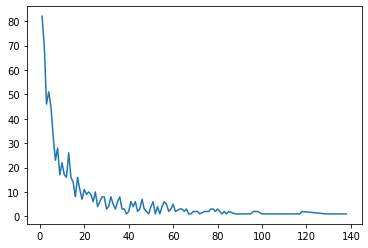


latitude
Example of values: [32.54 32.55 32.56 32.57 32.58 32.59 32.6  32.61 32.62 32.63]
Min: 32.54 - Max: 41.95 - Median: 36.96072705601907
Nr of unique values: 839 -  Max occurence: 200 - Min occurence: 1
Number of na: 0


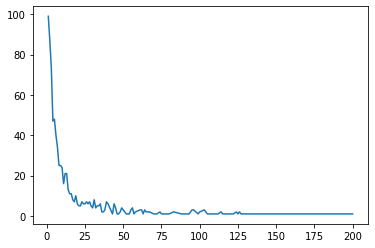


housing_median_age
Example of values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Min: 1.0 - Max: 52.0 - Median: 26.5
Nr of unique values: 52 -  Max occurence: 1021 - Min occurence: 4
Number of na: 0


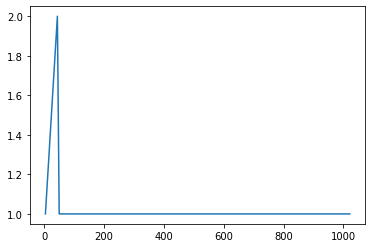


total_rooms
Example of values: [ 2.  6.  8. 11. 12. 15. 18. 19. 20. 21.]
Min: 2.0 - Max: 39320.0 - Median: 3681.524199417758
Nr of unique values: 5496 -  Max occurence: 15 - Min occurence: 1
Number of na: 0


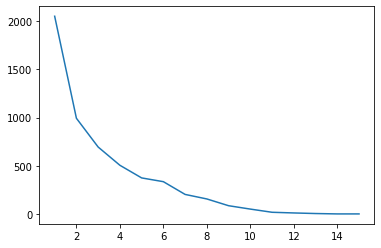


total_bedrooms
Example of values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Min: 1.0 - Max: 6445.0 - Median: nan
Nr of unique values: 1995 -  Max occurence: 48 - Min occurence: 1
Number of na: 168


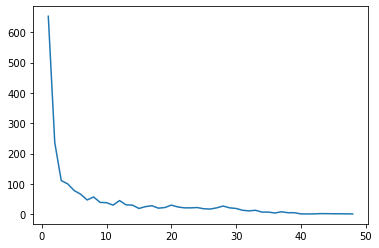


population
Example of values: [ 3.  5.  6.  8.  9. 11. 13. 14. 15. 17.]
Min: 3.0 - Max: 35682.0 - Median: 2238.1895604395604
Nr of unique values: 3640 -  Max occurence: 23 - Min occurence: 1
Number of na: 0


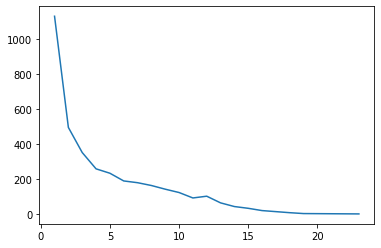


households
Example of values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Min: 1.0 - Max: 6082.0 - Median: 1001.4146767617938
Nr of unique values: 1717 -  Max occurence: 49 - Min occurence: 1
Number of na: 0


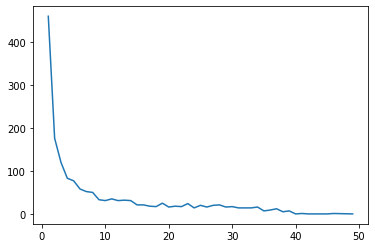


median_income
Example of values: [0.4999 0.536  0.5495 0.6433 0.6825 0.6991 0.7007 0.7025 0.7069 0.7075]
Min: 0.4999 - Max: 15.0001 - Median: 4.10347061351376
Nr of unique values: 10937 -  Max occurence: 41 - Min occurence: 1
Number of na: 0


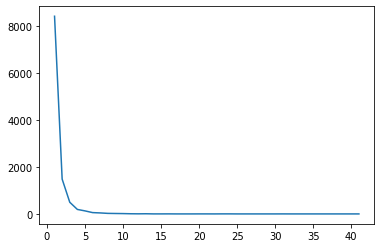


ocean_proximity
Example of values: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [24]:
for column in data.columns:
    print(column)
    unique, count = np.unique(data[column],return_counts = True)
    print("Example of values: {}".format(unique[:10]))
    print("Min: {} - Max: {} - Median: {}".format(min(unique),max(unique),np.mean(unique)))
    print("Nr of unique values: {} -  Max occurence: {} - Min occurence: {}".format(len(unique),max(count),min(count)) )
    print("Number of na: {}".format(data[column].isna().sum()))
    occurences,countcount = np.unique(count, return_counts= True)
    plt.plot(occurences,countcount)
    plt.show()
    print()